**Project Topic:** Envisioning Success: Predicting University Scores With Machine Learning.


# Collect The Dataset

**Importing the libraries**

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')


**Read the Dataset**

In [5]:
snc_df=pd.read_csv("snc.csv")
snc_df.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [6]:
times=pd.read_csv("timesData.csv")
times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [7]:
cwur=pd.read_csv("cwurData.csv")
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


**Handling missing values**

In [8]:
snc_df.isnull().sum()

school_name    0
country        0
dtype: int64

In [9]:
times.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [10]:
times['student_staff_ratio'].fillna(times['student_staff_ratio'].mean(), inplace=True)
times['international_students'].fillna(times['international_students'].mode()[0], inplace=True)
mode_value = times['female_male_ratio'].mode()[0]
times['female_male_ratio'].fillna(mode_value, inplace=True)
times['num_students'] = pd.to_numeric(times['num_students'], errors='coerce')
times['num_students'].fillna(times['num_students'].mean(), inplace=True)


In [11]:
times.isnull().sum()

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [12]:
cwur.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [13]:
cwur['broad_impact'].fillna(cwur['broad_impact'].mean(), inplace=True)

In [14]:
cwur.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

**Handling Categorical Values**

In [15]:
dataTypeSeries = cwur.dtypes
print('Data type of each column of timesData Dataframe\n')
print(dataTypeSeries)

Data type of each column of timesData Dataframe

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object


In [16]:
dataTypeSeries = times.dtypes
print('Data type of each column of timesData Dataframe\n')
print(dataTypeSeries)

Data type of each column of timesData Dataframe

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students              float64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object


Data Transformation:

In [17]:
times['world_rank'] = pd.to_numeric(times['world_rank'], errors='coerce')
times['female_male_ratio'] = pd.to_numeric(times['female_male_ratio'], errors='coerce')
times['income'] = pd.to_numeric(times['income'], errors='coerce')
times['total_score'] = pd.to_numeric(times['total_score'], errors='coerce')
times['international_students'] = pd.to_numeric(times['international_students'], errors='coerce')
times['international'] = pd.to_numeric(times['international'], errors='coerce')

# Exploratory Data Analysis

**Descriptive Statistical**

In [18]:
snc_df.describe(include='all')

,school_name,country
count,818,818
unique,818,70
top,Harvard University,United States of America
freq,1,161


In [19]:
cwur.describe(include='all')

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200,2200,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
unique,NaN,1024,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Harvard University,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,459.590909,NaN,NaN,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,NaN,NaN,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.561032,273.996525,7.760806,0.762130
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,NaN,NaN,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,273.000000,170.750000,44.460000,2014.000000
50%,450.500000,NaN,NaN,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.699500,426.000000,45.100000,2014.000000
75%,725.250000,NaN,NaN,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000


In [20]:
times.describe(include='all')

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
count,1112.000000,2603,2603,2603.000000,2594.000000,2603.000000,2603.000000,2385.000000,1201.000000,2603.000000,2603.000000,0.0,0.0,2603.000000
unique,NaN,818,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Harvard University,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,98.201439,NaN,NaN,37.801498,52.007440,35.910257,60.921629,48.979874,59.846128,564.333333,18.445283,NaN,NaN,2014.075682
std,58.097290,NaN,NaN,17.604218,22.103825,21.254805,23.073219,21.179938,12.803446,4.914045,11.328041,NaN,NaN,1.685733
min,1.000000,NaN,NaN,9.900000,7.100000,2.900000,1.200000,24.200000,41.400000,462.000000,0.600000,NaN,NaN,2011.000000
25%,48.000000,NaN,NaN,24.700000,33.425000,19.600000,45.500000,33.000000,50.300000,564.333333,12.050000,NaN,NaN,2013.000000
50%,97.000000,NaN,NaN,33.900000,50.300000,30.500000,62.500000,41.000000,56.000000,564.333333,16.300000,NaN,NaN,2014.000000
75%,148.000000,NaN,NaN,46.400000,69.000000,47.250000,79.050000,59.000000,66.200000,564.333333,21.200000,NaN,NaN,2016.000000


# Visual Analysis

 **Univariate Analysis**

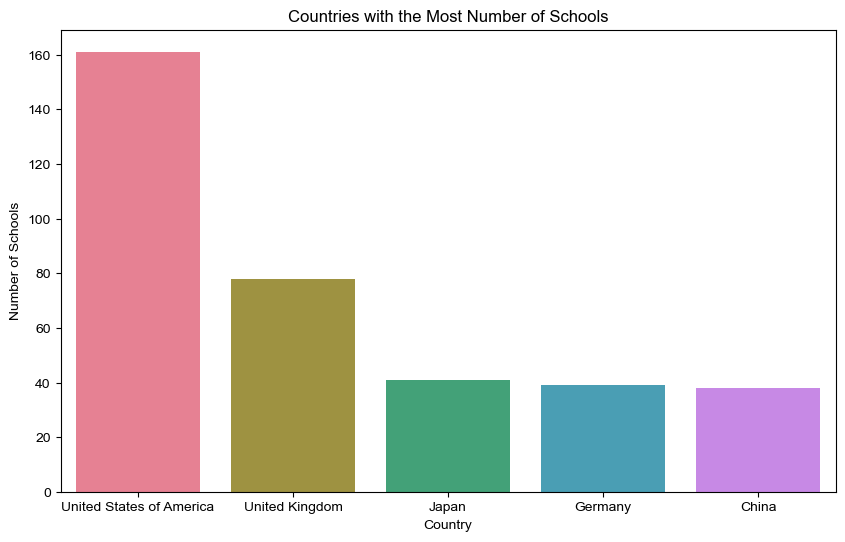

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by country and count the number of schools, then take the top 5
most_schools = snc_df.groupby('country')['school_name'].count().sort_values(ascending=False).head()

# Create arrays for x and y points
x_points = most_schools.index
y_points = most_schools.values

# Define a color palette with enough colors for each bar
colors = sns.color_palette('husl', len(most_schools))

# Bar plot with specified color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=x_points, y=y_points, palette=colors)
sns.set_style("darkgrid")

plt.xlabel("Country")
plt.ylabel("Number of Schools")
plt.title("Countries with the Most Number of Schools")
plt.show()


**Observation:** From the plot we can see that USA has the most number of Schools followed by UK, Japan, Germany and China

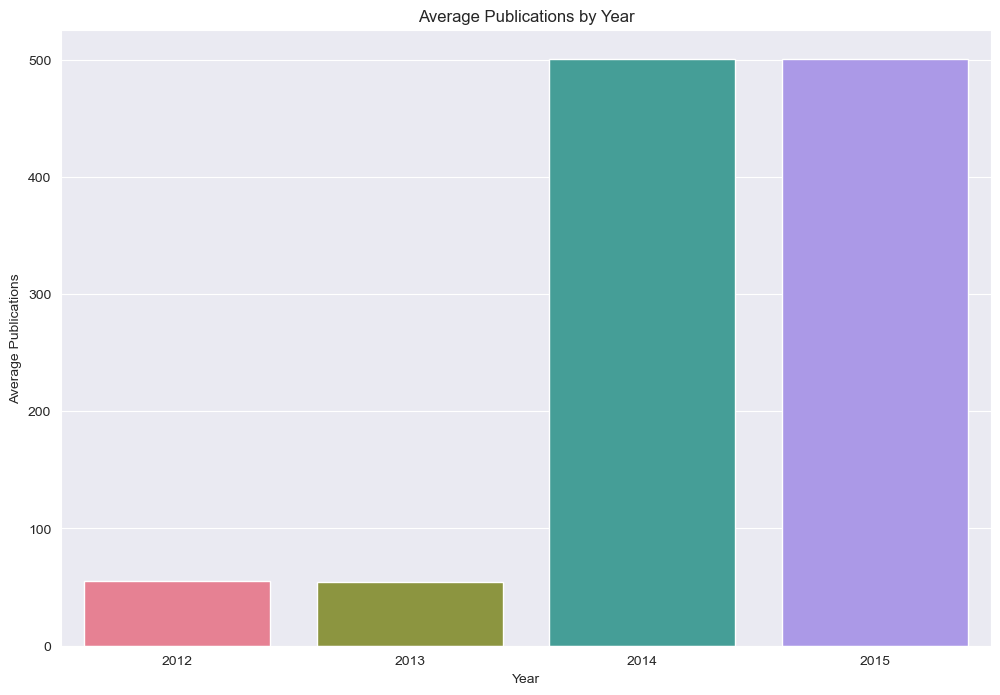

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year and calculate the mean of publications
avg_publications_by_year = cwur.groupby('year')['publications'].mean().reset_index()

# Define a color palette with enough colors for each bar
colors = sns.color_palette('husl', len(avg_publications_by_year))

# Bar chart with specified color palette
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_publications_by_year, x='year', y='publications', palette=colors)
plt.title('Average Publications by Year')
plt.xlabel('Year')
plt.ylabel('Average Publications')
plt.show()


**Observation:**The average number of publications experienced a significantly large increase from 2012 to 2015.

**Bivariate Analysis**

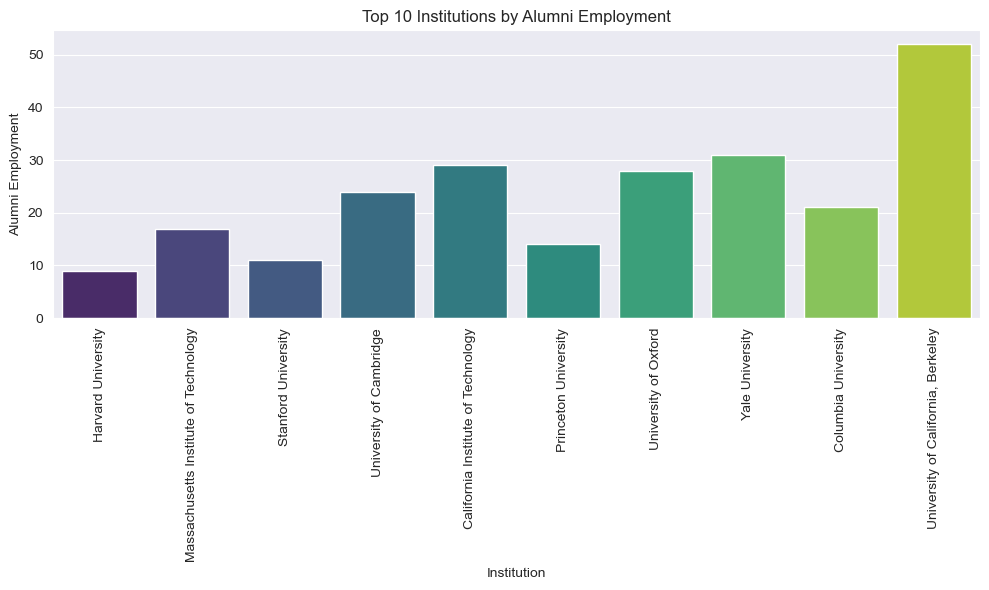

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'cwur' containing the relevant information

# Select the top 10 institutions
Top10 = cwur.head(10)

# Define a color palette
colors = sns.color_palette("viridis", len(Top10))

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Top10.index, y=Top10['alumni_employment'], data=Top10, palette=colors)
plt.xticks(range(len(Top10)), Top10['institution'], rotation=90)  # Setting custom tick labels
plt.xlabel('Institution')
plt.ylabel('Alumni Employment')
plt.title('Top 10 Institutions by Alumni Employment')
plt.tight_layout()
plt.show()


**Observation:**The top university by alumni employment is University of California, Berkeley.

**Multivariate Analysis**

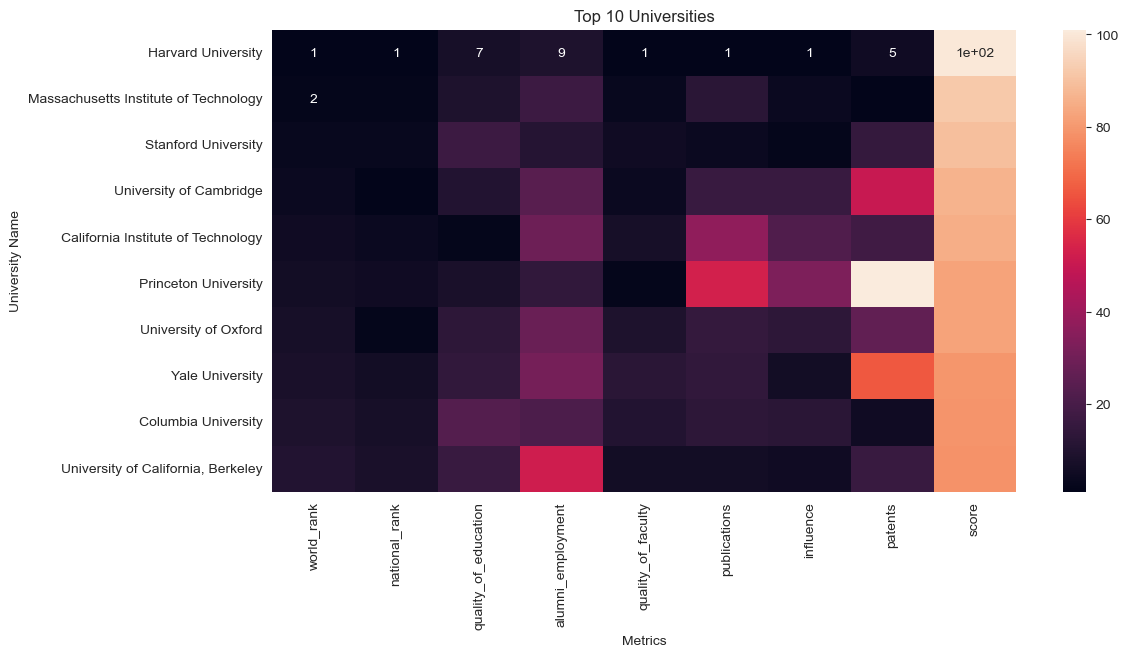

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cwur' is your dataframe
top = cwur.head(10)

# Selecting specific columns and setting 'university_name' as index
top_10 = top[['world_rank', 'national_rank', 'quality_of_education', 'alumni_employment',
              'quality_of_faculty', 'publications', 'influence', 'patents', 'score']]
top_10.set_index(top['institution'], inplace=True)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data=top_10, annot=True)
plt.title('Top 10 Universities')
plt.xlabel('Metrics')
plt.ylabel('University Name')
plt.show()



**Observations:**
Harvard University is ranked first based on the score metric.
Massachusetts Institute of Technology (MIT) is ranked second.
California Institute of Technology (Caltech) is ranked fifth.
University of California, Berkeley is ranked tenth.

# Model Building

Assigns the feature data to the variable X and the target label to the variable y


In [25]:
import numpy as np

# Selecting specific columns for X and y
X = cwur[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'patents']]
y = cwur['score']

# Confirming the shape of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2200, 7)
y shape: (2200,)


In [26]:
X.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,7,9,1,1,1,1,5
1,9,17,3,12,4,4,1
2,17,11,5,4,2,2,15
3,10,24,4,16,16,11,50
4,2,29,7,37,22,22,18


In [27]:
y.head()

0    100.00
1     91.67
2     89.50
3     86.17
4     85.21
Name: score, dtype: float64

In [28]:
import numpy as np

# Reshaping y to have shape (n_samples, 1)
y = np.array(y).reshape(-1, 1)

# Confirming the shape of y
print("y shape:", y.shape)


y shape: (2200, 1)


**Splitting the data into training and testing sets**

In [29]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760, 1)
y_test shape: (440, 1)


# Training The Model In Multiple Algorithms

Linear Regression:

In [30]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred_lr= linReg.predict(X_test)


Lasso Regression:


In [31]:
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X, y)
y_pred_lasso = lassoReg.predict(X_test)


Support Vector Regression(SVR):

In [32]:
svr = SVR().fit(X, y)
y_pred_svr=svr.predict(X_test)

Decision Tree:

In [33]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X, y)
y_pred_dt = dt.predict(X_test)


Random Forest:

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)
y_pred_rf = rf.predict(X_test)


# Testing Models

Using a trained model to predict the target variable based on the provided input features.

In [35]:
#Linear Regression:
y_pred_lr= linReg.predict([[7,9,1,1,1,1,5]])
print(y_pred_lr)


[[63.33166471]]


In [36]:
#Lasso Regression:
y_pred_lasso = lassoReg.predict([[7,9,1,1,1,1,5]])
print(y_pred_lasso)


[62.96954351]


In [37]:
#Random Forest:
y_pred_rf = rf.predict([[7,9,1,1,1,1,5]])

print(y_pred_rf)


[99.42905833]


In [38]:
#Support Vector Regression(SVR):
y_pred_svr=svr.predict([[7,9,1,1,1,1,5]])

print(y_pred_svr)


[60.0246015]


In [39]:
#Decision Tree:
y_pred_dt= dt.predict([[7,9,1,1,1,1,5]])

print(y_pred_dt)


[100.]


**Result:**Decision Tree model and the Random Forest model are giving similar predictions, with the Decision Tree predicting exactly 100 and the Random Forest predicting 99.42905833, which is very close. Other models, however, are providing lower predicted values compared to these two models.

# Testing Model With Multiple Evaluation Metrics

**Linear Regression**

In [40]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

# Printing results
print("Prediction Evaluation using Linear Regression:")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("R-squared:", lr_r2)
print("\n")


Prediction Evaluation using Linear Regression:
MAE: 2.6657340636132787
MSE: 28.917809410716277
RMSE: 5.377528187812341
R-squared: 0.46307977669338285




**Lasso Regression**

In [41]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)

# Printing results
print("Prediction Evaluation using Lasso Regression:")
print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("RMSE:", lasso_rmse)
print("R-squared:", lasso_r2)
print("\n")


Prediction Evaluation using Lasso Regression:
MAE: 2.660478123834028
MSE: 28.893569757635724
RMSE: 5.3752739239629195
R-squared: 0.4635298370613741




**Random Forest**

In [42]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

# Printing results
print("Prediction Evaluation using Random Forest:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R-squared:", rf_r2)
print("\n")

Prediction Evaluation using Random Forest:
MAE: 0.5835158143939388
MSE: 1.5899396219925848
RMSE: 1.2609280796272977
R-squared: 0.9704794120204712




**Support Vector Regression(SVR)**

In [43]:
# SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)

# Printing results
print("Prediction Evaluation using SVR:")
print("MAE:", svr_mae)
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)
print("R-squared:", svr_r2)
print("\n")

Prediction Evaluation using SVR:
MAE: 1.7292341972937126
MSE: 26.88372393706387
RMSE: 5.184951681266072
R-squared: 0.5008468707089301




**Decision Tree**

In [44]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

# Printing results
print("Prediction Evaluation using Decision Tree:")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R-squared:", dt_r2)

Prediction Evaluation using Decision Tree:
MAE: 0.7662954545454547
MSE: 2.983666590909091
RMSE: 1.7273293232354654
R-squared: 0.9446019264630141


**Result:**
Based on the provided evaluation metrics, it appears that the **Random Forest model** is performing the best among the tested models.

1.Lowest Error Metrics: The Random Forest model has the lowest values for Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) compared to the other models. Lower values of these metrics indicate better predictive performance and closer alignment of predictions with the actual values.


2.High R-squared: The Random Forest model also has the highest R-squared value, indicating that it explains a significant proportion of the variance in the target variable. A higher R-squared value suggests that the model fits the data well.

# Model Deployment


Save The Best Model

In [45]:
import pickle

filename = 'model.pkl'  # Use the filename directly as a string
pickle.dump(rf, open(filename, 'wb'))
